# Predicting sentiment from product reviews

# Fire up Libraries

# 1 - Sheldon Goulart
# 2 - Vinícius Teodoro

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Read some product review data

## Loading reviews for a set of baby products. 

In [2]:
products = pd.read_csv('amazon_baby.csv')

# Let's explore this data together

## Data includes the product name, the review text and the rating of the review. 

## Given that we have some lines with empty registers, we drop them

In [3]:
products.shape

(183531, 3)

In [4]:
products.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [5]:
products.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [6]:
products.isnull().sum()

name      318
review    829
rating      0
dtype: int64

In [7]:
products = products.dropna(axis=0) # axis = 0 means we drop lines

In [8]:
products.isnull().sum()

name      0
review    0
rating    0
dtype: int64

In [9]:
products.shape # we lost a few examples

(182384, 3)

# Examining the reviews for most-sold product:  'Vulli Sophie the Giraffe Teether'

In [10]:
c = Counter(products['name'].values)

In [11]:
print 'Most common:'
for name, count in c.most_common(10):
    print '%s: %7d' % (name, count)

Most common:
Vulli Sophie the Giraffe Teether:     779
Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L:     560
Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision:     558
Baby Einstein Take Along Tunes:     545
Cloud b Twilight Constellation Night Light, Turtle:     517
Fisher-Price Booster Seat, Blue/Green/Gray:     487
Fisher-Price Rainforest Jumperoo:     446
Graco Nautilus 3-in-1 Car Seat, Matrix:     418
Leachco Snoogle Total Body Pillow:     388
Regalo Easy Step Walk Thru Gate, White:     372


# What this Sophie the Giraffe?

# <img src="sophie.jpg">

In [12]:
giraffe_reviews = products[products['name'] == 'Vulli Sophie the Giraffe Teether']

In [13]:
len(giraffe_reviews)

779

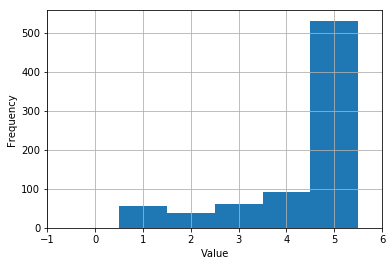

In [14]:
plt.hist(giraffe_reviews['rating'], bins=np.arange(10)-0.5)
plt.xlabel("Value")
plt.xlim([-1,6])
plt.ylabel("Frequency")
plt.grid('on')
plt.show()

# Build a sentiment classifier

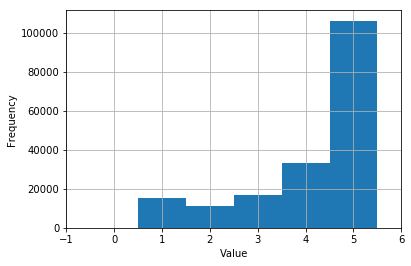

In [15]:
plt.hist(products['rating'], bins=np.arange(10)-0.5)
plt.xlabel("Value")
plt.xlim([-1,6])
plt.ylabel("Frequency")
plt.grid('on')
plt.show()

## Define what's a positive and a negative sentiment

We will ignore all reviews with rating = 3, since they tend to have a neutral sentiment.  Reviews with a rating of 4 or higher will be considered positive, while the ones with rating of 2 or lower will have a negative sentiment.   

In [16]:
#ignore all 3* reviews
products = products[products['rating'] != 3]

In [17]:
#positive sentiment = 4* or 5* reviews
products['sentiment'] = products['rating'] >=4

In [18]:
products.head()

,name,review,rating,sentiment
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,True
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,True
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,True
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,True
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,True


## Let's train the sentiment classifier

In [19]:
train_data = products.sample(frac=0.8, random_state=200)
test_data  = products.drop(train_data.index)
print(train_data.shape, test_data.shape)

((132543, 4), (33136, 4))


# Build the word count vector for each review

In [20]:
count_vectorizer = CountVectorizer()
x_train = count_vectorizer.fit_transform(train_data['review'].values)

# Build the y vector

In [21]:
y_train = train_data['sentiment'].values

# Training the classifier

In [22]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Evaluate the sentiment model

In [23]:
x_test = count_vectorizer.transform(test_data['review'].values)
y_test = test_data['sentiment'].values

# predict class labels for the test set
predicted = classifier.predict(x_test)

In [24]:
predicted

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [25]:
# generate class probabilities
probs = classifier.predict_proba(x_test)
print probs

[[  3.28170585e-01   6.71829415e-01]
 [  1.66314790e-05   9.99983369e-01]
 [  6.77141686e-08   9.99999932e-01]
 ..., 
 [  1.72969847e-03   9.98270302e-01]
 [  2.13110036e-02   9.78688996e-01]
 [  9.77814344e-03   9.90221857e-01]]


In [26]:
# generate evaluation metrics
print metrics.accuracy_score(y_test, predicted)
print metrics.roc_auc_score(y_test, probs[:, 1])

0.931947126992
0.958379650477


# Applying the learned model to understand sentiment for Giraffe

In [27]:
sophie_probs = classifier.predict_proba(count_vectorizer.transform(giraffe_reviews['review']))

In [28]:
sophie_probs.shape

(779, 2)

In [29]:
giraffe_reviews['predicted_sentiment'] = sophie_probs.max(axis=1)

In [30]:
giraffe_reviews.head()

,name,review,rating,predicted_sentiment
34313,Vulli Sophie the Giraffe Teether,He likes chewing on all the parts especially t...,5,0.998435
34314,Vulli Sophie the Giraffe Teether,My son loves this toy and fits great in the di...,5,0.999200
34315,Vulli Sophie the Giraffe Teether,There really should be a large warning on the ...,1,0.666160
34316,Vulli Sophie the Giraffe Teether,All the moms in my moms' group got Sophie for ...,5,0.947993
34317,Vulli Sophie the Giraffe Teether,I was a little skeptical on whether Sophie was...,5,0.622104


## Sort the reviews based on the predicted sentiment and explore

In [31]:
giraffe_reviews = giraffe_reviews.sort_values('predicted_sentiment', ascending=False)

## Most positive reviews for the giraffe

In [32]:
giraffe_reviews.head()

,name,review,rating,predicted_sentiment
34892,Vulli Sophie the Giraffe Teether,"Sophie, oh Sophie, your time has come. My gran...",5,1.0
34434,Vulli Sophie the Giraffe Teether,My Mom-in-Law bought Sophie for my son when he...,5,1.0
34515,Vulli Sophie the Giraffe Teether,"As every mom knows, you always want to give yo...",5,1.0
34442,Vulli Sophie the Giraffe Teether,"Yes, it's imported. Yes, it's expensive. And y...",5,1.0
34341,Vulli Sophie the Giraffe Teether,I'll be honest...I bought this toy because all...,4,1.0


In [33]:
print giraffe_reviews[giraffe_reviews.index==34892]['review'].values

[ "Sophie, oh Sophie, your time has come. My granddaughter, Violet is 5 months old and starting to teeth. What joy little Sophie brings to Violet. Sophie is made of a very pliable rubber that is sturdy but not tough. It is quite easy for Violet to twist Sophie into unheard of positions to get Sophie into her mouth. The little nose and hooves fit perfectly into small mouths, and the drooling has purpose. The paint on Sophie is food quality.Sophie was born in 1961 in France. The maker had wondered why there was nothing available for babies and made Sophie from the finest rubber, phthalate-free on St Sophie's Day, thus the name was born. Since that time millions of Sophie's populate the world. She is soft and for babies little hands easy to grasp. Violet especially loves the bumpy head and horns of Sophie. Sophie has a long neck that easy to grasp and twist. She has lovely, sizable spots that attract Violet's attention. Sophie has happy little squeaks that bring squeals of delight from Vi

In [34]:
print giraffe_reviews[giraffe_reviews.index==34434]['review'].values

[ 'My Mom-in-Law bought Sophie for my son when he was just starting to really chew on things (and we were hearing some pretty scary things about toys not made in the USA). She did some research and came across Sophie and we are so glad that she did! While Sophie doesn\'t come from the USA, we love the fact that she is 100% safe and natural, and my son loves to play with her. I also love how soft Sophie is, my son tends to swing his toys around and when he\'s sitting on my lap I\'m usually in danger of being hit in the face with whatever he\'s holding, needless to say a soft toy is even better in my book! There\'s one last thing I want to comment on, I\'ve read reviews that said that Sophie was a "glorified dog toy" or something to that effect, and I don\'t want to seem rude, but I think they\'re crazy! Yes Sophie does squeak, (which my son didn\'t care about much at first but now he loves) but that\'s about as far as the comparison could go! If you want a quality teething toy for your 

## Show most negative reviews for giraffe

In [35]:
giraffe_reviews.tail()

,name,review,rating,predicted_sentiment
34777,Vulli Sophie the Giraffe Teether,WoW. That is my one word summary. Originally I...,1,0.509951
34960,Vulli Sophie the Giraffe Teether,My 5-month old played with Sophie off and on f...,4,0.507400
34677,Vulli Sophie the Giraffe Teether,My baby enjoys this toy but the LOUD squeak ha...,2,0.506949
34576,Vulli Sophie the Giraffe Teether,"I thought it was made from a special material,...",2,0.506028
34723,Vulli Sophie the Giraffe Teether,"This is a cute item, however, the box arrived ...",2,0.504178


In [36]:
print giraffe_reviews[giraffe_reviews.index==34576]['review'].values

[ 'I thought it was made from a special material, but the product is very simple, a mere plastic that can be found everywhere. it is too expensive.']


In [37]:
print giraffe_reviews[giraffe_reviews.index==35072]['review'].values

[ "I recently ordered this as a gift and compared the this one to the one my son has and wow u can tell it's fake. The serial number is hard to read and the rubber is way harder than the authentic ones and it's has a funny smells!! So not the original vulli Sophia"]


# Quizz questions

### Answer 1

In [38]:
def word_count(string):
    my_string = string.lower().split()
    my_dict = {}
    for item in my_string:
        my_dict[item] = item.count(item)
    return my_dict

In [39]:
products['word_count'] = products['review'].apply(word_count)

In [40]:
products.head()

,name,review,rating,sentiment,word_count
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,True,"{u'and': 1, u'love': 1, u'it': 1, u'highly': 1..."
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,True,"{u'and': 1, u'quilt': 1, u'it': 1, u'comfortab..."
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,True,"{u'and': 1, u'ingenious': 1, u'love': 1, u'pos..."
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,True,"{u'and': 1, u'parents!!': 1, u'all': 1, u'help..."
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,True,"{u'and': 1, u'cute': 1, u'would': 1, u'help': ..."


In [41]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']

In [42]:
def awesome_count(word_count):
    if 'awesome' in word_count:
        return word_count['awesome']
    return 0

products['awesome'] = products['word_count'].apply(awesome_count)

def great_count(word_count):
    if 'great' in word_count:
        return word_count['great']
    return 0

products['great'] = products['word_count'].apply(great_count)

def fantastic_count(word_count):
    if 'fantastic' in word_count:
        return word_count['fantastic']
    return 0

products['fantastic'] = products['word_count'].apply(fantastic_count)

def amazing_count(word_count):
    if 'amazing' in word_count:
        return word_count['amazing']
    return 0

products['amazing'] = products['word_count'].apply(amazing_count)

def love_count(word_count):
    if 'love' in word_count:
        return word_count['love']
    return 0

products['love'] = products['word_count'].apply(love_count)

def horrible_count(word_count):
    if 'horrible' in word_count:
        return word_count['horrible']
    return 0

products['horrible'] = products['word_count'].apply(horrible_count)

def bad_count(word_count):
    if 'bad' in word_count:
        return word_count['bad']
    return 0

products['bad'] = products['word_count'].apply(bad_count)

def terrible_count(word_count):
    if 'terrible' in word_count:
        return word_count['terrible']
    return 0

products['terrible'] = products['word_count'].apply(terrible_count)

def awful_count(word_count):
    if 'awful' in word_count:
        return word_count['awful']
    return 0

products['awful'] = products['word_count'].apply(awful_count)

def wow_count(word_count):
    if 'wow' in word_count:
        return word_count['wow']
    return 0

products['wow'] = products['word_count'].apply(wow_count)

def hate_count(word_count):
    if 'hate' in word_count:
        return word_count['hate']
    return 0

products['hate'] = products['word_count'].apply(hate_count)

In [43]:
products.head()

,name,review,rating,sentiment,word_count,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,True,"{u'and': 1, u'love': 1, u'it': 1, u'highly': 1...",0,0,0,0,1,0,0,0,0,0,0
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,True,"{u'and': 1, u'quilt': 1, u'it': 1, u'comfortab...",0,0,0,0,0,0,0,0,0,0,0
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,True,"{u'and': 1, u'ingenious': 1, u'love': 1, u'pos...",0,0,0,0,1,0,0,0,0,0,0
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,True,"{u'and': 1, u'parents!!': 1, u'all': 1, u'help...",0,1,0,0,0,0,0,0,0,0,0
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,True,"{u'and': 1, u'cute': 1, u'would': 1, u'help': ...",0,1,0,0,0,0,0,0,0,0,0


In [44]:
print 'Use Of Words:'

for word in selected_words:
    print '{0}: {1}'.format(word, products[word].sum())
    
#awesome: 1924
#great: 35586
#fantastic: 847
#amazing: 1253
#love: 33110
#horrible: 622
#bad: 3017
#terrible: 642
#awful: 327
#wow: 119
#hate: 998
# Mais usada é 'great' e a menos usada é 'wow'

Use Of Words:
awesome: 1924
great: 35586
fantastic: 847
amazing: 1253
love: 33110
horrible: 622
bad: 3017
terrible: 642
awful: 327
wow: 119
hate: 998


### Answer 2

In [45]:
train_data = products.sample(frac=0.8, random_state=200)
test_data  = products.drop(train_data.index)
print(train_data.shape, test_data.shape)

((132543, 16), (33136, 16))


In [46]:
x_train = train_data[selected_words].values.reshape(-1,len(selected_words))
y_train = train_data['sentiment'].values.ravel()

In [47]:
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
x_test = test_data[selected_words].values.reshape(-1, len(selected_words))
y_test = test_data['sentiment'].values

In [49]:
predicted = classifier.predict(x_test)
predicted

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [50]:
probs = classifier.predict_proba(x_test)
print probs

[[ 0.04656907  0.95343093]
 [ 0.08393062  0.91606938]
 [ 0.04656907  0.95343093]
 ..., 
 [ 0.01548653  0.98451347]
 [ 0.08393062  0.91606938]
 [ 0.20507567  0.79492433]]


In [51]:
print metrics.accuracy_score(y_test, predicted)
print metrics.roc_auc_score(y_test, probs[:, 1])

0.840294543699
0.662099165391


In [52]:
myarray = np.array(selected_words)
print myarray
print count_vectorizer.transform(myarray)

['awesome' 'great' 'fantastic' 'amazing' 'love' 'horrible' 'bad' 'terrible'
 'awful' 'wow' 'hate']
  (0, 5791)	1
  (1, 23212)	1
  (2, 19861)	1
  (3, 4183)	1
  (4, 30289)	1
  (5, 25135)	1
  (6, 6266)	1
  (7, 50384)	1
  (8, 5797)	1
  (9, 56781)	1
  (10, 24172)	1


In [53]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']

In [54]:
count_vectorizer = CountVectorizer()

X_test=count_vectorizer.fit_transform(selected_words)
classifier.predict_proba(X_test)

array([[ 0.08393062,  0.91606938],
       [ 0.68488698,  0.31511302],
       [ 0.04656907,  0.95343093],
       [ 0.07670981,  0.92329019],
       [ 0.59885438,  0.40114562],
       [ 0.69647474,  0.30352526],
       [ 0.09174888,  0.90825112],
       [ 0.2114321 ,  0.7885679 ],
       [ 0.09528105,  0.90471895],
       [ 0.53556872,  0.46443128],
       [ 0.41876432,  0.58123568]])

In [55]:
selected_words_model = classifier.predict_proba(count_vectorizer.fit_transform(selected_words))

In [56]:
selected_words_model.shape

(11, 2)

In [62]:
print selected_words_model.max(axis=1)

[ 0.91606938  0.68488698  0.95343093  0.92329019  0.59885438  0.69647474
  0.90825112  0.7885679   0.90471895  0.53556872  0.58123568]


In [63]:
print selected_words_model

[[ 0.08393062  0.91606938]
 [ 0.68488698  0.31511302]
 [ 0.04656907  0.95343093]
 [ 0.07670981  0.92329019]
 [ 0.59885438  0.40114562]
 [ 0.69647474  0.30352526]
 [ 0.09174888  0.90825112]
 [ 0.2114321   0.7885679 ]
 [ 0.09528105  0.90471895]
 [ 0.53556872  0.46443128]
 [ 0.41876432  0.58123568]]


### Answer 3

### Answer 4